MetaData:

The dataset consists of 10 000 data points stored as rows with 14 features in columns

- UID: unique identifier ranging from 1 to 10000
- productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

- Target: Failure or not
- Failure Type: Type of Failure

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [106]:
path = 'data/predictive_maintenance.csv'

df = pd.read_csv(path)

In [107]:
df_copy = df.copy()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [110]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000
Failure Type,10000,6,No Failure,9652


Observations:
- ProductID appears to be redundant
- As mentioned by dataset creator, there are two targets

In [111]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

array([[<AxesSubplot:title={'center':'UDI'}>,
        <AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>,
        <AxesSubplot:title={'center':'Tool wear [min]'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

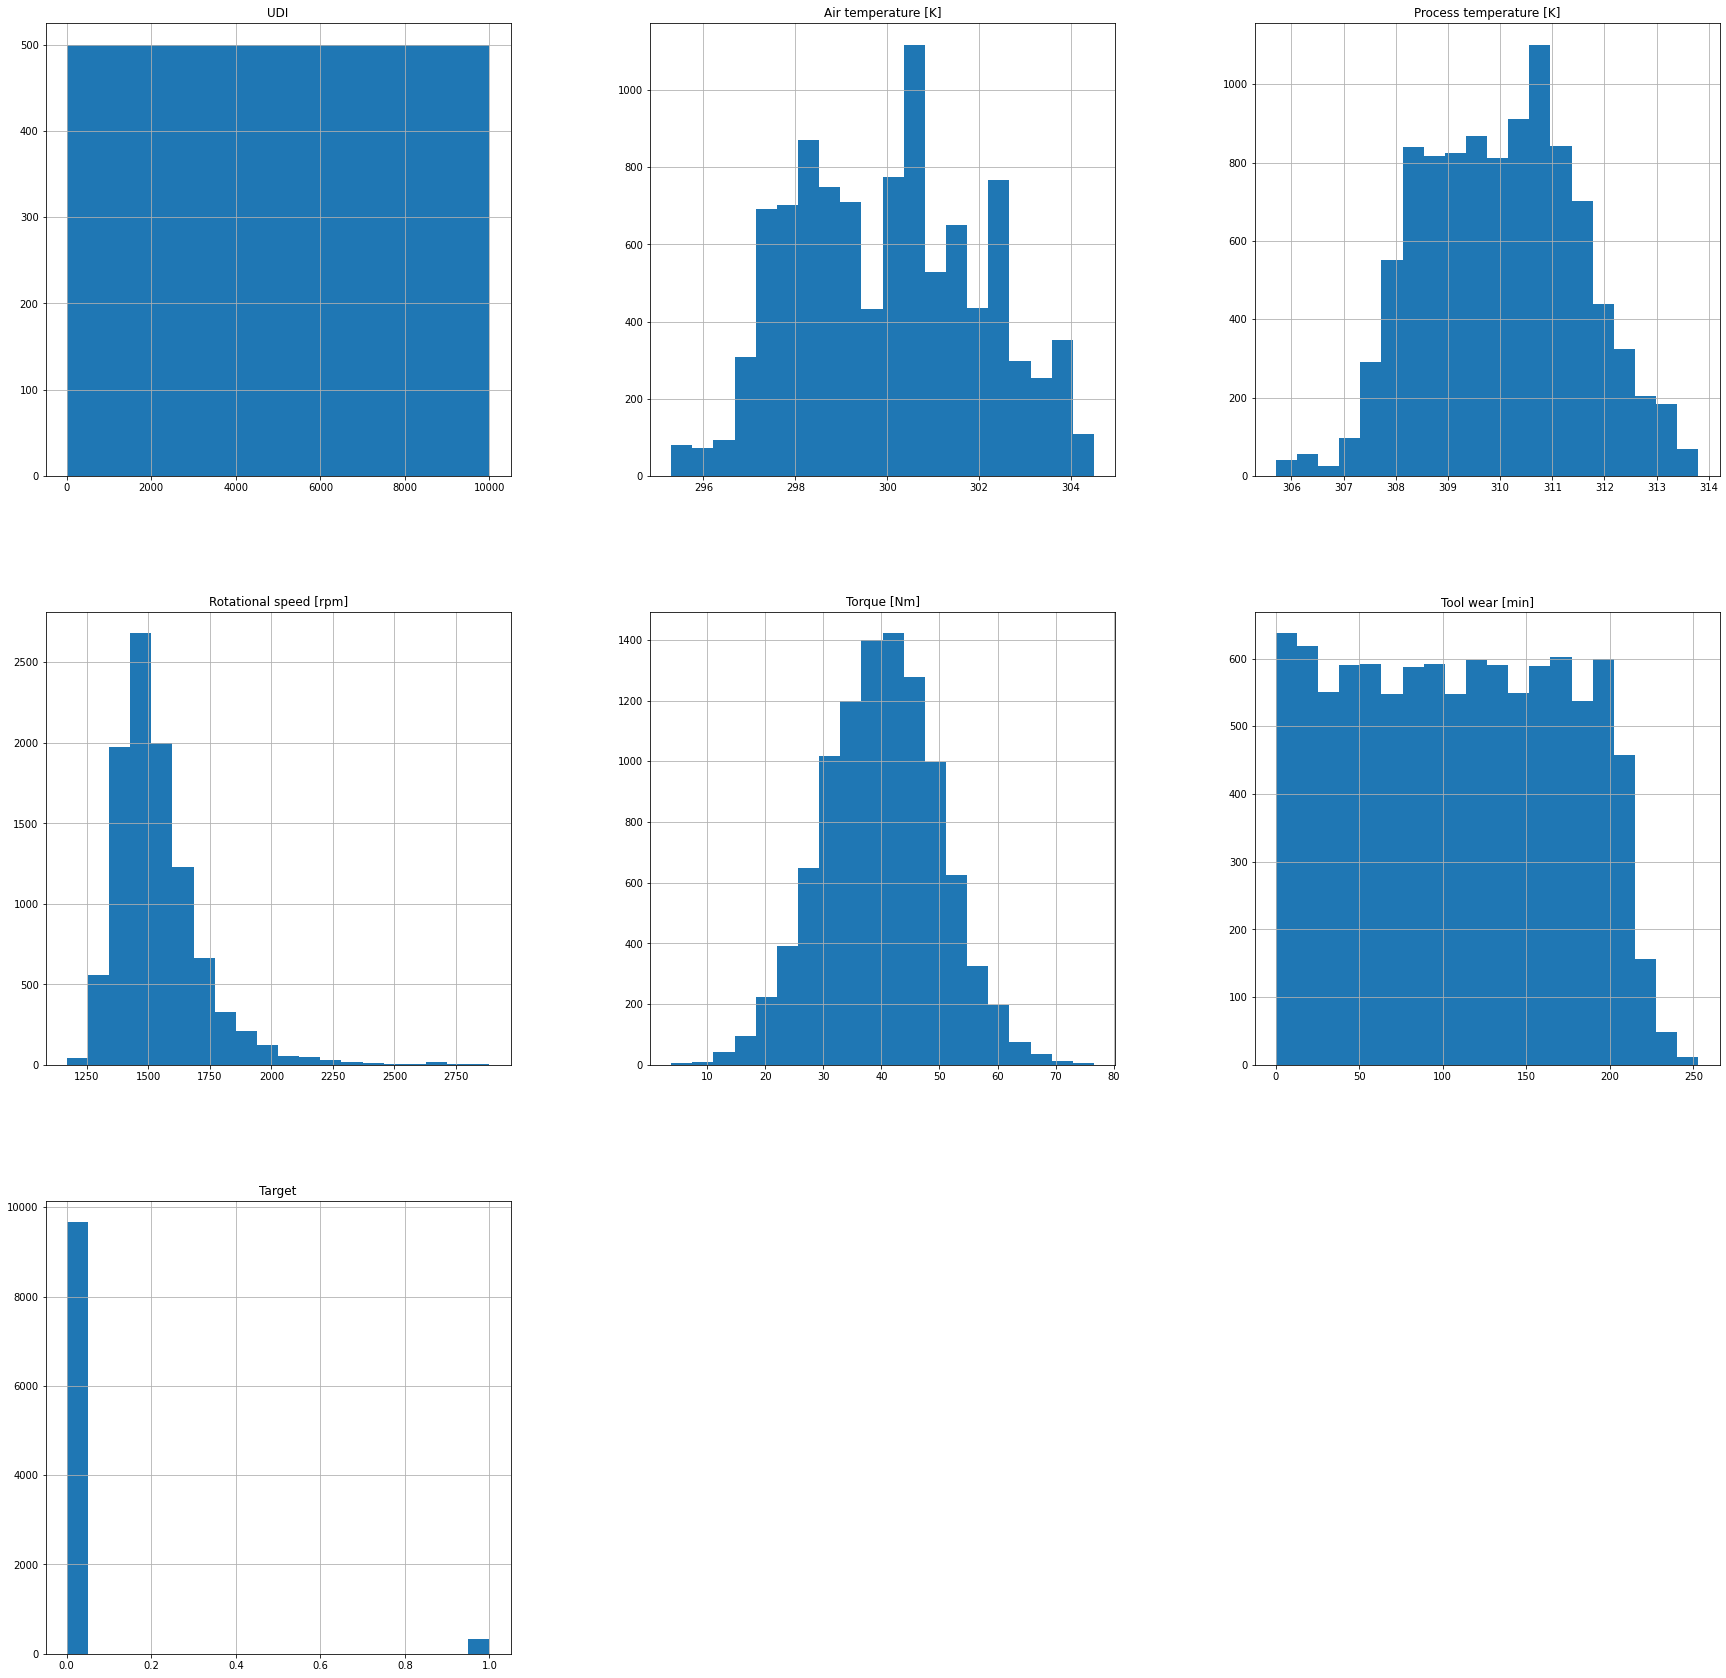

In [112]:
df.select_dtypes(exclude='object').hist(bins=20, figsize=(30,30))

### Observations
- Some distributions appear to be normal like air temp, process temp, rotational speed and torque
- Tool wear and UDI appear to be uniformly distributed
- Target is severely imbalanced

In [113]:
df.Target.value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Observations:

There does not appear to be any explicit null values

In [115]:
print('Unique number of Product ID : {}'.format(len(df['Product ID'].unique())))
print('Unique number of UDI : {}'.format(len(df['UDI'].unique())))

Unique number of Product ID : 10000
Unique number of UDI : 10000


In [116]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


Observations
- The product ID appears to be a combination of the Type followed by some random numbers
- The UDI appears to just be an index

Both cols can be dropped


In [117]:
df.drop(columns=['UDI','Product ID'], inplace= True)

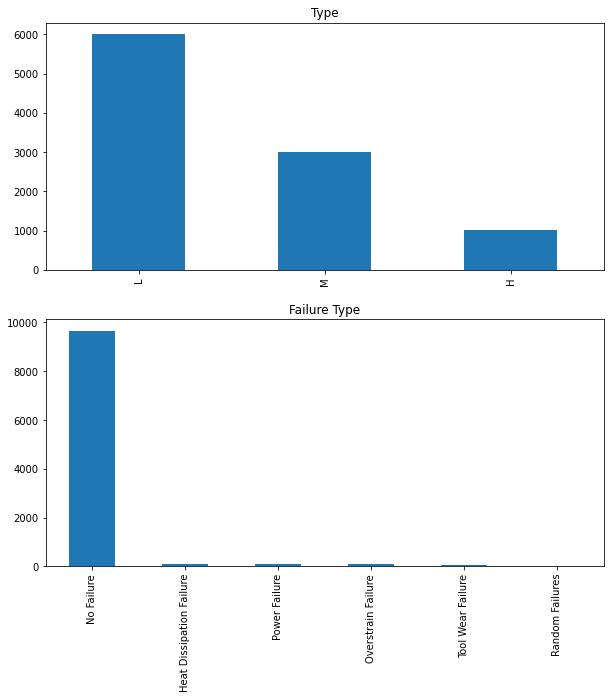

In [118]:
num_cols = len(list(df.select_dtypes(include='object').columns))

fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize = (10,10))

for i, col in enumerate(df.select_dtypes(include='object').columns):
    df.loc[:,col].value_counts().plot(kind='bar', ax=axes[i], title = col)

We need to check if the target corresponds with the failure type. I.e if its target is 0 it should classified as no failure under failure type and if target is 1 which should see a type of failure

In [119]:
num_consistent_nofail = len(df[(df.Target == 0) & (df['Failure Type'] == 'No Failure')])
num_inconsistent_nofail = len(df[(df.Target == 1) & (df['Failure Type'] == 'No Failure')])
num_consistent_fail = len(df[(df.Target == 1) & (df['Failure Type'] != 'No Failure')])

In [120]:
print(f'Number of consistent no fails is {num_consistent_nofail} \n\
Number of inconsistent no fails is {num_inconsistent_nofail} \n\
Number of consistent fails is {num_consistent_fail} \n\
Total Percentage of consistent entry is {(num_consistent_fail+num_consistent_nofail)/len(df)}')

Number of consistent no fails is 9643 
Number of inconsistent no fails is 9 
Number of consistent fails is 330 
Total Percentage of consistent entry is 0.9973


So it appears that there are some implicitly invalid targets or at least they are inconsistent with the associated failure types. As we are unable to confirm these entries and they form only the miniority (0.01%), we will remove them. 

We are left with 9991 observations with 8 features

In [121]:
df.drop(df[(df.Target == 1) & (df['Failure Type'] == 'No Failure')].index, inplace=True)
df.shape

(9991, 8)

In [122]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


KeyboardInterrupt: 

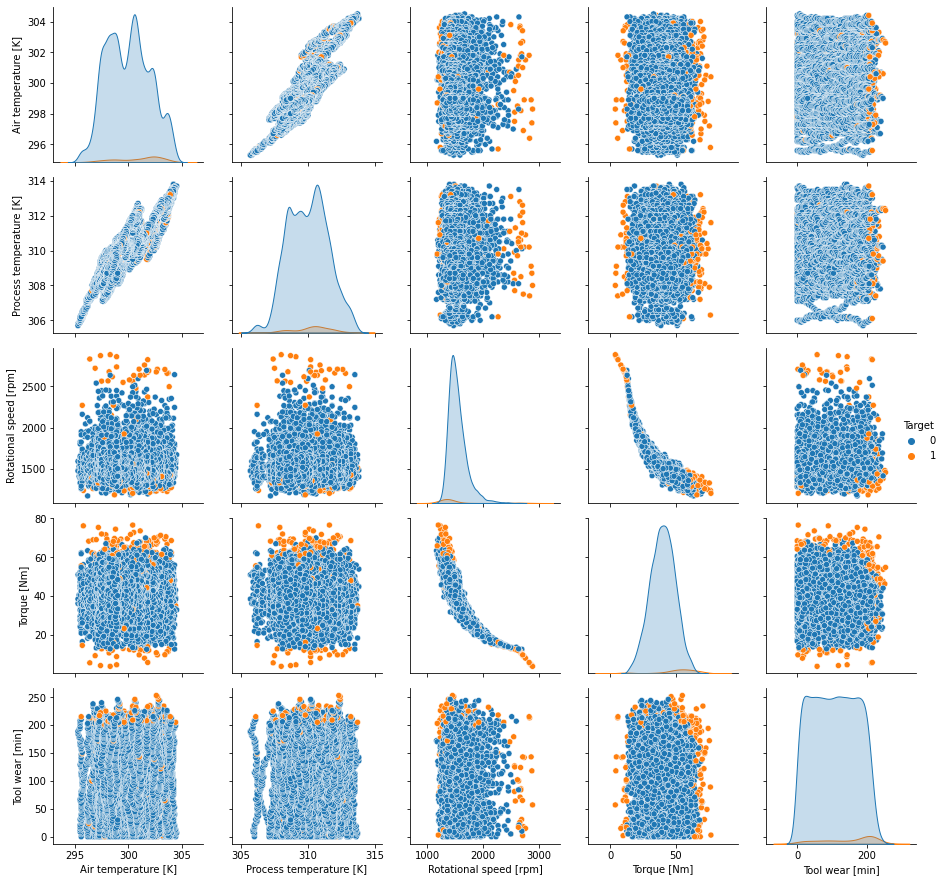

In [123]:
sns.pairplot(data=df, hue='Target')

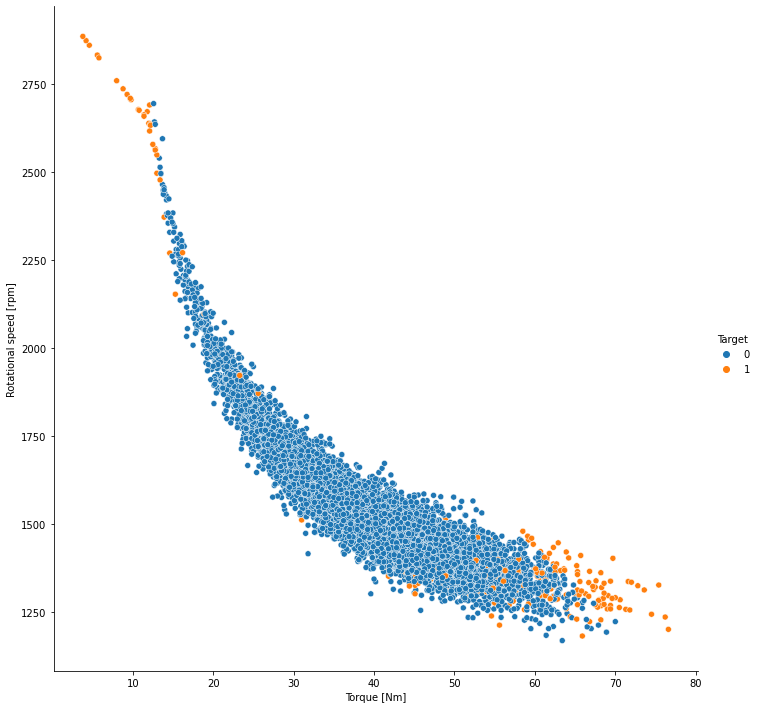

In [ ]:
sns.pairplot(data=df, x_vars='Torque [Nm]', y_vars='Rotational speed [rpm]', hue='Target', height=10)

Observations:
This is pretty telling of the nature of the target that we see. If anything the target appear to be linearly seperable for almost most of the features.

### Feature Engineering and Selection

I do not have any domain knowledge so I will skip feature engineering.

I will need to check if any features correlate with each other and lastly check if the features correlate with the target.

<AxesSubplot:>

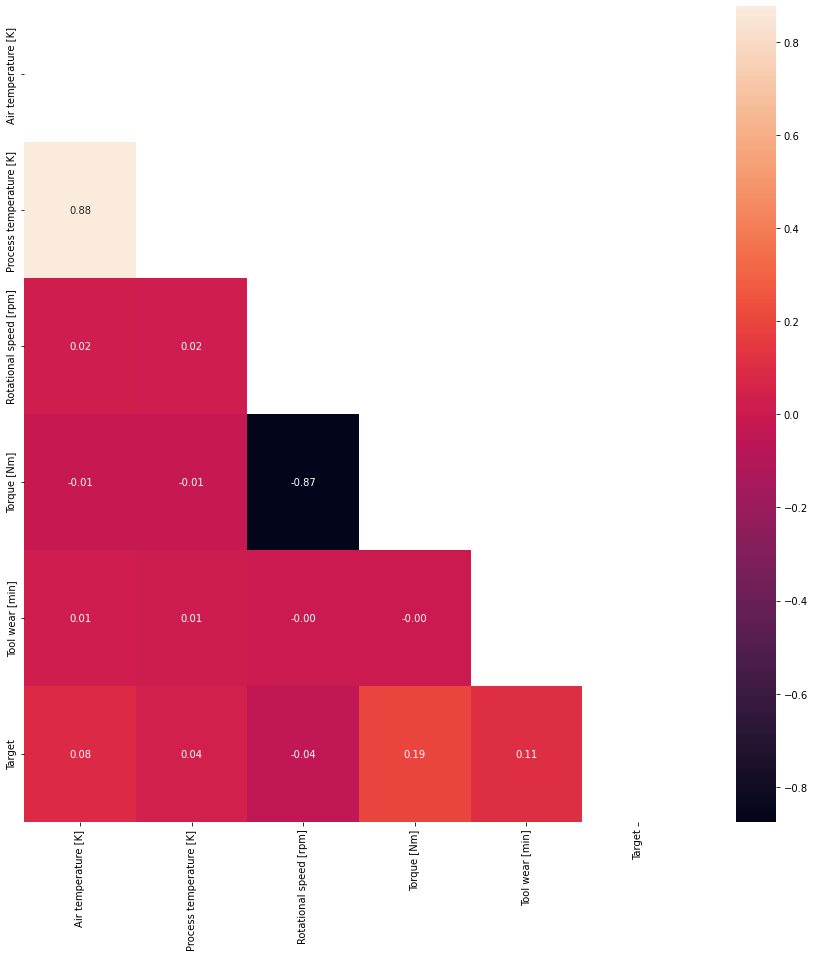

In [124]:
fig = plt.figure(figsize=(15, 15))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask)

Observations:
The air temperature is highly positively correlated to the process temperature while the rotational speed is highly negatively correlated to the torque. None are correlated to the target.

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#### Actions done so far:
- Dropped UDI col
- Dropped Product Type col
- Removed rows with inconsistent target with failure type

#### Actions to be done:
- Standardise numerical features namely: Air Temp, Process Temp, Torque, Tool wear

#### Try:
- Oversample if it improves accuracy
- Feature Engineering or reducing features to improve accuracy

Going forward I will use target as the target instead of failure type

In [126]:
y = df.pop('Target')
df.drop(columns='Failure Type', inplace= True)
x = df

In [127]:
cat_features = 'Type'
num_features = df.select_dtypes(include=('int','float')).columns.to_list()

In [128]:
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


In [129]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9991 non-null   object 
 1   Air temperature [K]      9991 non-null   float64
 2   Process temperature [K]  9991 non-null   float64
 3   Rotational speed [rpm]   9991 non-null   int64  
 4   Torque [Nm]              9991 non-null   float64
 5   Tool wear [min]          9991 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 804.4+ KB


In [131]:
smote = SMOTE(random_state=RANDOM_STATE)

In [132]:
y.value_counts(normalize=True)

0    0.96697
1    0.03303
Name: Target, dtype: float64

In [133]:
y.value_counts(normalize=False)

0    9661
1     330
Name: Target, dtype: int64

In [134]:
x[cat_features].to_numpy().reshape(-1,1)

array([['M'],
       ['L'],
       ['L'],
       ...,
       ['M'],
       ['H'],
       ['M']], dtype=object)

In [135]:
ohe = OneHotEncoder(drop='first', sparse=False)

X_ohe = ohe.fit_transform(x[cat_features].to_numpy().reshape(-1,1))

In [136]:
X_ohe_merged = np.concatenate((X_ohe,x.drop(columns=cat_features)),axis=1)

In [137]:
X_oversampled, y_oversampled = smote.fit_resample(X_ohe_merged, y)

In [138]:
y_oversampled.value_counts(normalize=True)

0    0.5
1    0.5
Name: Target, dtype: float64

In [139]:
y_oversampled.value_counts()

0    9661
1    9661
Name: Target, dtype: int64

#### Split Data

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=TEST_SIZE,random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

In [142]:
algos = {'lr': LogisticRegression(),
'svc': SVC(),
'knn': KNeighborsClassifier(),
'rf': RandomForestClassifier(),
'lgbm': LGBMClassifier()}

In [144]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [143]:
def evaluate_models(algos, params):
    results = []
    best_params = []

    for name, algo in algos.items():
        print(f'model name is {name}')
        cv = RandomizedSearchCV(algo,params)
        cv.fit(X_train, y_train)
        y_pred = cv.predict(X_val)
        recall_score = recall_score(y_val, y_pred)
        precision_score = precision_score(y_val, y_pred)
        f1_score = f1_score(y_val, y_pred)
        accuracy_score = accuracy_score(y_val, y_pred)
        scores = [recall_score, precision_score, f1_score, accuracy_score]
        results.append([name]+ scores)
        best_params.append([name])
    
    return results

model name is lr
model name is svc
model name is knn
model name is rf
model name is lgbm
